# 1.Einleitung:
Die Riemann-Zeta-Funktion wird wie folgt definiert $\zeta(s)=\sum\nolimits_{n=1}^\infty\frac{1}{n^s}=\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+...$
. Zu Beginn wird in diesem Beispiel versucht die Riemann-Zeta-Funktion durch einfache Summation zu ermitteln. Dabei treten jedoch, wie unten beschrieben, gewisse Probleme auf. Aus diesem Grund wird durch die Mittelwertbildung versucht auf ein präziseres Ergebnis zukommen. Es bleiben jedoch weitere Probleme erhalten. Deshalb haben wir einen effizienteren Algorithmus implementiert, der auf Grund der Konvergenz alternierender Reihen funktioniert. Zu den jeweiligen Methoden gibt es Erklärungen und gegebenenfalls Plots in den unteren Abschnitten. Man beachte, dass wir nur $\zeta(2)$ betrachten.
# 2.Einfache Summe:
## 2.1 Ansatz und Abbruchkriterium:
In diesem Fall summieren wir von 1 bis hin zu N Iterationen und addieren in einer for-Schleife jeweils $\frac{1}{n^2}$ für steigende n hinzu.
Dadurch nähern wir uns dem erwarteten Wert von $\pi^2/6$ an. Zudem verwenden wir ein Abbruchkriterium, um bei der gewollten Genauigkeit von $10^{-15}$ zu stoppen. Dabei sollte der vorherige Term(hier mit Delta beschrieben) der Ordnung $10^{-16}$ entsprechen. Wir vergleichen jeweils die Differenz zwischen dem Vorherigen("zeta_2") und dem resultierendem Term("zeta_1"). Fällt diese Differenz unter die zuvor erwähnte Genauigkeit endet der Algorithmus. Dabei ist die Konvergenzordnung $\frac{1}{n^2}$.       


In [3]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt


#Variablen
s = 2
zeta_1 = 0
eps = 1*10**(-15)
N_1= 10**15


for n in range(1,N_1+1):
    zeta_2=zeta_1
    zeta_1=zeta_1+(1/n**s)
    if abs(zeta_2-zeta_1)<eps:
        print('Durchlauf: ', n)
        print('Zeta_2: ',zeta_2)
        print('Zeta_1: ',zeta_1)
        print('Delta: ',1/n**s)
        print('Difference: ',zeta_1-zeta_2)
        print('pi**2/6:',np.pi**2/6)
        break

Durchlauf:  31635422
Zeta_2:  1.6449340353029747
Zeta_1:  1.6449340353029756
Delta:  9.992007142506634e-16
Difference:  8.881784197001252e-16
pi**2/6: 1.6449340668482264


## 2.2 Problematik/Beobachtung:
Es ist zu erkennen dass die Differenz zwischen Zeta_1 und Zeta_2 nicht dem hinzuaddierten Term entspricht. Somit ist davon auszugehen dass die Maschinengenauigkeit nicht ausreicht um über einfache Summation die gewünschte Genauigkeit zu erhalten. Zudem ist die Anzahl an Iteration mit 31635422 ziemlich groß wodurch dies möglicherweise nicht auf jedem Rechner durchführbar ist. Es ist zusehen das bei einfacher Summation mit $10^8$ Durchläufen, da die Konvergenzordnung $\frac{1}{n^2}$ beträgt, eine Genauigkeit von $10^{-16}$ erreicht wird.

## 2.3 Plot:

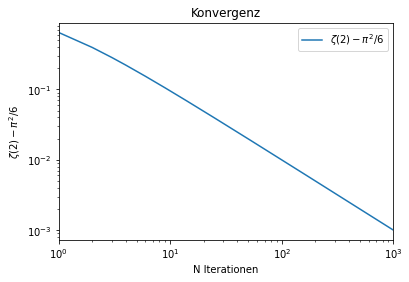

In [4]:
def Zeta(N):
    zeta_1=0
    for n in range(1,N+1):
        zeta_2=zeta_1
        zeta_1=zeta_1+(1/n**s)
    return zeta_1
    
N=range(1,1000)

#Plot
plt.plot(N,[abs(Zeta(n)-np.pi**2/6) for n in N],label='$\zeta(2)-\pi^2/6$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N Iterationen')
plt.ylabel('$\zeta(2)-\pi^2/6$')
plt.title('Konvergenz')


plt.xlim(1,10**3)

# show a legend on the graph
plt.legend()

# show graph
plt.show()


## 2.4 Beschreibung des Plots:
In diesem Plot wird das Konvergenzverhalten der Summe dargestellt. Dafür haben wir die ersten 1000 Iterationen verwendet und logarithmisch die Differenz $\zeta(2)-\frac{\pi^2}{6}$ gegen die Anzahl an Iterationen aufgetragen. Man erkennt den schnellen Abfall Richtung 0, wodurch gezeigt wird das sich $\zeta(2)$ an den erwarteten Wert von $\frac{\pi^2}{6}$ annähert. Der Abfall verläuft dabei nach $\frac{1}{n^2}$.




# 3.Fortgeschrittene Reihenbildung$^3$
## 3.1 Ansatz und Abbruchkriterium
Dieser Alorithmus basiert auf der alternierenden Reihe und der Mittelwert-Bildung. Dabei verwenden wir die aus der Vorlesung bekannte Direchlet-Eta-Funktion. .Die gewählte Abbruchbedingung entspricht der aus dem ersten Alorithmus. Es wird somit erneut die Differenz zwischen den beiden Termen vor und nach dem zusätzlichen Element verglichen. Um von der Direchlet-Eta-Funktion auf die Rieman-Zeta-Funktion zukommen wird die folgende Rechnung verwendet:
$$\zeta_n(s)=\sum\nolimits_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}=(1-2^{1-s})\zeta(s)$$
$$=\sum\nolimits_{n=1}^\infty\frac{1-2^{1-s}}{n^s}$$
$$=\sum\nolimits_{n=1}^\infty\frac{1}{n^s}-\frac{2}{2^s}\frac{1}{n^s}=\sum\nolimits_{n=1}^\infty\frac{1}{n^s}-\frac{2}{(2m)^s}$$
Vergleicht man nun die einzelnen Reihenelemente der Rieman-Zeta-Funktion mit der oben zusehenden Funktion folgt die alternierende Reihe:
$$\frac{1}{1^s}+\frac{1}{2^s}+\frac{1}{3^s}+\frac{1}{4^s}+...\enspace (1)$$
$$\frac{1^2}{1^s}+\frac{1^2}{2^s}+\frac{1^2}{3^s}+\frac{1^2}{4^s}+...\enspace (2)$$
$$\rightarrow\enspace-\frac{2}{2^s}-\frac{2}{4^s}-...\enspace (3)$$
$$\text{Es gilt also:  } \zeta_n(s)=\sum\nolimits_{n=1}^\infty\frac{(-1)^{n-1}}{n^s}=(1-2^{1-s})\zeta(s)\enspace\enspace\enspace\square$$

In [5]:
#Verwende alternierende Reihe (-> Dirichlet Etafunktion)
eta_1 = 0
eps = 1*10**(-15)
S_neu = 0

N_1= 10**15

for n in range(1,N_1+1):
    eta_2 = eta_1
    eta_1 = eta_1 + (-1)**(n+1)/n**s
    S_alt = S_neu
    S_neu = 1/2*(eta_1 + eta_2)
    if abs(abs(S_alt/(1-2**(1-s)))-abs(S_neu/(1-2**(1-s))))<eps:
        break

print('Zeta(2):',S_neu/(1-2**(1-s)))
print('Differenz zum Idealwert:',abs(np.pi**2/6-S_neu/(1-2**(1-s))))
print('Iterationen:',n)

$\zeta(2):$ 1.644934066848191
Differenz zum Idealwert: 3.530509218307998e-14
Iterationen: 118013


## 3.3 Konvergenzverhalten/Konvergenzordnung:
Für die Konvergenordnung des Mittelwertverfahrens gilt:
$$\zeta_n'=\frac{1}{2}\cdot(\frac{1}{n^2}-\frac{1}{(n-1)^2})=\frac{1}{2}\cdot(\frac{1}{n^2}-\frac{1}{(n^2+2n+1})$$
$$=\frac{1}{2}\cdot(\frac{n^2-2n+1-n^2}{n^2(n^2-2n+1)})$$
$$=\frac{1}{2}(\frac{-2n+1}{n^4-2n^3+n^2})$$
$$=\frac{1}{2}\cdot(\frac{-2n+1}{n^4-2n^3+n^2})=O(\frac{1}{n^3})$$
Somit folgt die Konvergenz $n^{-3}$.


## 3.4 Plot:

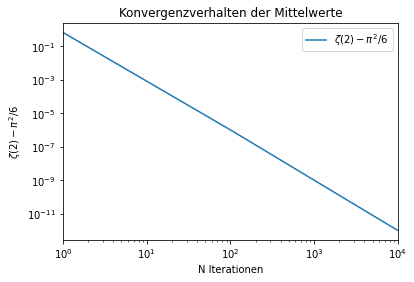

In [6]:
#Plot
def Zeta2(N):
    eta_1=0
    S_neu = 0
    for n in range(1,N+1):
        eta_2 = eta_1
        eta_1 = eta_1 + (-1)**(n+1)/n**s
        S_alt = S_neu
        S_neu = 1/2*(eta_1 + eta_2)

    zeta_6=S_neu/(1-2**(1-s))
    return zeta_6
    
N=range(1,10000,100)

#Plot
plt.plot(N,[abs(Zeta2(n)-np.pi**2/6) for n in N],label='$\zeta(2)-\pi^2/6$')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N Iterationen')
plt.ylabel('$\zeta(2)-\pi^2/6$')
plt.title('Konvergenzverhalten der Mittelwerte')
plt.xlim(1,10000)
# show a legend on the graph
plt.legend()

# show graph
plt.show()



## 3.5 Beschreibung des Plots:
Man sieht eneut das typische Konvergenzverhalten ähnlich wie zuvor. Im Plot wird die Anzahl an Iterationen gegen die Differenz von $\zeta(2)$ zum Idealwert $\frac{\pi^2}{6}$ aufgetragen. Dabei werden jedoch deutlich weniger Iterationen bis zum erreichen der gewählten Genauigkeit benötigt als zuvor.



# 4.effizienterer Algorithmus$^{1,}$$^2$:
Dieser effizientere Algorithmus basiert auf der Konvergenz alternierender Reihen, die in den beiden angegebenen Dokumenten genauer beschrieben wird.$^{1,}$$^2$

Die folgende Rechnung stammt aus diesen angegebenen Dokumenten.

Es gilt:

für $\zeta(s)=\frac{1}{d_0(1-2^{1-s})}\sum\nolimits_{k=1}^n\frac{(-1)^{k-1}d_k}{k^s}+\gamma_n(s)$

mit $d_k=n\sum\nolimits_{j=k}^n$ $\frac{(n+j-1)!4^j}{(n-j)!(2j)!}$ 

und dem Fehlerterm: $|\gamma_n(s)|\leq\frac{2}{(3+\sqrt{8})^n}\frac{1}{|\Gamma(s)|}\frac{1}{|1-2^{1-s}|}\leq\frac{3}{(3+\sqrt{8})^n}\frac{(1+2|t|)e^{|t|\pi/2} }{|1-2^{1-s}|}$. Dieser wird hier allerdings nicht verwendet.


In [7]:
import numpy as np
import math as m

#Anfangswerte
s = 2
eps = 10**(-15)

#Berechnet Koeffizienten d
def d(k,n):
    d = 0
    for j in range(k,n+1):
        d = d + n*m.factorial(n+j-1)*4**j/(m.factorial(n-j)*m.factorial(2*j))
    return d


#Berechne die Riemann Zeta funktion
def Zeta(n):
    Zeta = 0
    for k in range(1,n+1):
        Zeta = Zeta + ((-1)**(k-1)*d(k,n))/(d(0,n)*(1-2**(1-s))*k**s)
    return Zeta

Zeta_1 = 0
for n in range(1,1000):
       Zeta_2 = Zeta_1
       Zeta_1 = Zeta(n)
       if abs(abs(Zeta_2)-abs(Zeta_1)) < eps:
           break
print('Iterationen:',n)
print('Zeta(2)',Zeta(18))
print('Differenz:',np.pi**2/6-Zeta(18)) 

Iterationen: 19
Zeta(2) 1.6449340668482269
Differenz: -4.440892098500626e-16


## 4.1 Beobachtungen:
An der Anzahl der Iterationen lässt sich die Effizienz erkennen. Mit 19 Iterationen ist dieser Algorithmus im Vergleich zu den 31635422 aus dem ersten Algorithmus deutlich effizienter. Zudem stößt man auch nicht direkt an Grenzen der Maschinengenauigkeit. Somit lässt sich die geforderte Genauigkeit von $10^{-15}$ erreichen.
## 4.2 Plot:

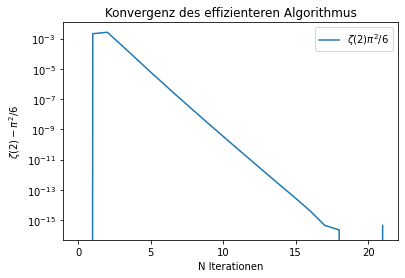

In [8]:
import matplotlib.pyplot as plt

#Betrache Konvergenzverhalten
Zeta_vals = []
for i in range(1,22+1):
    Zeta_vals.append(Zeta(i)-np.pi**2/6)
    #print(Zeta_vals)



plt.plot(Zeta_vals,label='$\zeta(2)\pi^2/6$')
plt.yscale('log')
plt.xlabel('N Iterationen')
plt.ylabel('$\zeta(2)-\pi^2/6$')
plt.title('Konvergenz des effizienteren Algorithmus')


# show a legend on the graph
plt.legend()

# show graph
plt.show()


## 4.3 Beschreibung des Plots:
Erneut wird das Konvergenzverhalten dargestellt. Hierbei wird die Anzahl an Iterationen verglichen mit der Differenz von $\zeta(2)$ zum Idealwert $\frac{\pi^2}{6}$.

# 5.Fazit:
Zusammendfassend lässt sich festhalten, dass die einfache Summe die geforderte Genauigkeit von $10^{-15}$ nicht erreicht auf Grund der Maschinengenauigkeit. Die zweite Variante der Mittelwertbildung ist deutlich effizienter und erreicht die geforderte Genauigkeit gut ohne das Fehler durch die Maschinengenauigkeit relevant werden. Die letzte Variante ist zwar die effizienteste jedoch ist nicht ersichtlich wie die mathematische Herleitung zu betrachten ist. Somit lässt sich festhalten das die zweite Variante die anschaulichste und gut zu implementieren ist 

# 6.Quellenangabe:
$^1$http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.56.9455
 
$^2$http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.693.9497&rep=rep1&type=pdf

$^3$Computerphysik-Vorlesung von Dr.Urbach an der Friedrichs-Wilhelm-Universität Bonn SoSe:21

$^4$https://de.wikipedia.org/wiki/Riemannsche_Zeta-Funktion#Konvergenzgeschwindigkeit